# preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline

import cv2

Definding function:

In [3]:
# this function give file of data  as numpy array or image

def getImageData(filename):
    f = open(filename,'rb')
    datadict = cPickle.load(f,encoding='latin1') #Why the hell latin1 ???
    f.close()
    X=datadict['data'].reshape((len(datadict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return X


# this function give file of data  as dictionary


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


#for show image in flatten form
def plotImage(X):
    plt.figure(figsize=(3, 3))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

laod data

shape of input image: (10000, 32, 32, 3)
#############################################
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
shape of target vector: (10000, 10)


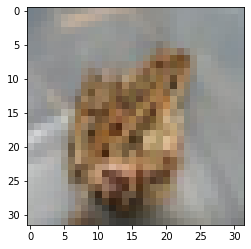

In [45]:
file='cifar-10-batches-py\data_batch_3'

X_image = getImageData(file)
x=unpickle(file)


print('shape of input image:',X_image.shape)
print('#############################################')
plt.imshow(X_image[22])


#geting vector  of target of data:
y=x[b'labels']
y_train=to_categorical(y)
print(y_train[22])
print('shape of target vector:',y_train.shape)

make image gary

In [46]:
temp=[]
for i in range(10000):
    temp.append(cv2.cvtColor(X_image[i], cv2.COLOR_BGR2GRAY))
    



In [47]:
data_gray=np.array(temp)

preprocessing---->resizeing to 16x16

(10000, 32, 32)

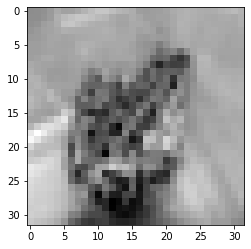

In [48]:
temp=[]
for i in range(10000):
    temp.append(cv2.resize(data_gray[i],(16,16)))
    
    
    
data=np.array(temp)

plt.imshow(data[22],cmap='gray')
data.shape

In [49]:
x_faltten=data.reshape(10000,-1)

x=x_faltten/255
x.shape

(10000, 1024)

Constructing model:

In [50]:
model=Sequential()


model.add(Dense(1000,activation='relu',input_dim=1024))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_14 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5010      
Total params: 2,531,510
Trainable params: 2,531,510
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
history=model.fit(x,y_train,validation_split=0.1,batch_size=128,epochs=40)

Epoch 1/40
71/71 [==============================] - 1s 15ms/step - loss: 2.1545 - accuracy: 0.2061 - val_loss: 2.0505 - val_accuracy: 0.2510
Epoch 2/40
71/71 [==============================] - 1s 13ms/step - loss: 1.9903 - accuracy: 0.2780 - val_loss: 1.9737 - val_accuracy: 0.2820
Epoch 3/40
71/71 [==============================] - 1s 13ms/step - loss: 1.9127 - accuracy: 0.3070 - val_loss: 1.9877 - val_accuracy: 0.2740
Epoch 4/40
71/71 [==============================] - 1s 16ms/step - loss: 1.8729 - accuracy: 0.3246 - val_loss: 1.8848 - val_accuracy: 0.3320
Epoch 5/40
71/71 [==============================] - 1s 17ms/step - loss: 1.8369 - accuracy: 0.3423 - val_loss: 1.9110 - val_accuracy: 0.3090
Epoch 6/40
71/71 [==============================] - 1s 17ms/step - loss: 1.7970 - accuracy: 0.3561 - val_loss: 1.8313 - val_accuracy: 0.3590
Epoch 7/40
71/71 [==============================] - 1s 17ms/step - loss: 1.7488 - accuracy: 0.3752 - val_loss: 1.8400 - val_accuracy: 0.3280
Epoch 8/40
71

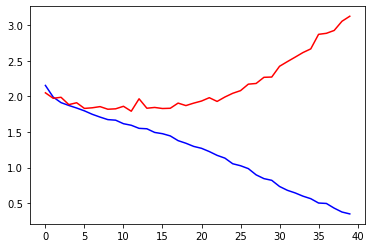

In [53]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

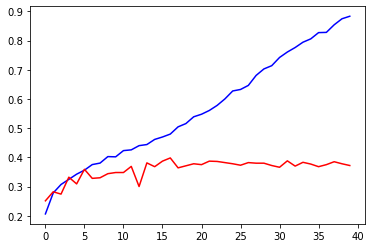

In [54]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [55]:
print('max acc of validation:',max(history.history['val_accuracy']))

max acc of validation: 0.39800000190734863


In [56]:
print('max acc of trian:',max(history.history['accuracy']))

max acc of trian: 0.8836666941642761
